In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
Titles = pd.read_csv('Titles_English.csv')

In [3]:
Titles = Titles.drop('Unnamed: 0', axis=1)
Titles['EAN'] = Titles['EAN'].astype(str)

In [4]:
Titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300359 entries, 0 to 300358
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   EAN                   300359 non-null  object
 1   Title                 300359 non-null  object
 2   Ingram Category Code  298878 non-null  object
 3   MJR BISAC             300359 non-null  object
 4   BISAC                 300359 non-null  object
 5   Annotation Text       300359 non-null  object
 6   Category              300359 non-null  int64 
 7   language_detected     300359 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.3+ MB


In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=650, ngram_range=(1,1), stop_words='english')
features = tfidf.fit_transform(Titles['Annotation Text']).toarray()
labels = Titles.Category
features.shape

(300359, 4661)

In [6]:
Titles_train, Titles_test = train_test_split(Titles, random_state=42)

C:\Users\Pupnsuds90\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 71.69%
LinearSVC accuracy: 71.87%
                  EAN                                              Title  \
272607  9781911413790  Dancing Bear                                  ...   
40303   9781646792375  Life of General Ulysses S. Grant: Containing a...   
172631  9781376644197  Adam's Illustrated Guide to Rye (with map): Wi...   
286961  9781649791696  Angela's Letter                               ...   
191935  9781377360799  Memoirs of a Professional Lady Nurse          ...   
...               ...                                                ...   
182491  9781614938200  Feeling Special                               ...   
23941   9781786234254  My Father's People                            ...   
2172    9781636171784  Every Kid's Guide to Coping with Childhood Tra...   
114632  9781647185596  Nevermore...                                  ...   
153901  9781608741144  Sea Pictures, Op.37: Vocal score (Urtext)     ...   

                       

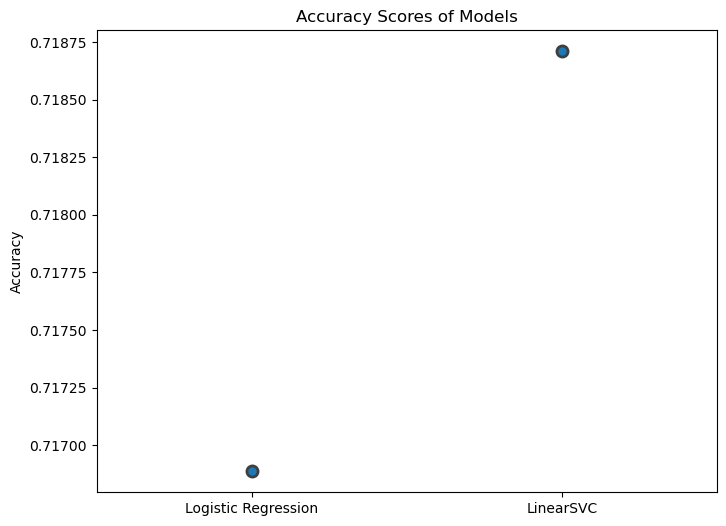

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

# Train the LogisticRegression model
log_reg_classifier = LogisticRegression(random_state=42)
log_reg_classifier.fit(X_train, y_train)

# Train the LinearSVC model
linear_svc_classifier = LinearSVC(random_state=42)
linear_svc_classifier.fit(X_train, y_train)

# Get the predicted labels and probabilities on the test data
y_pred_log_reg = log_reg_classifier.predict(X_test)
y_pred_proba_log_reg = log_reg_classifier.predict_proba(X_test)

y_pred_linear_svc = linear_svc_classifier.predict(X_test)
y_pred_decision_func_linear_svc = linear_svc_classifier.decision_function(X_test)

# Calculate accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression accuracy: {accuracy_log_reg*100:.2f}%')

# Calculate accuracy for LinearSVC
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print(f'LinearSVC accuracy: {accuracy_linear_svc*100:.2f}%')

# Create a dataframe with the predicted labels and maximum decision function values
results_df = pd.DataFrame({
    'Predicted Category (Logistic Regression)': y_pred_log_reg,
    'Confidence Score (Logistic Regression)': np.max(y_pred_proba_log_reg, axis=1),
    'Predicted Category (LinearSVC)': y_pred_linear_svc,
    'Confidence Score (LinearSVC)': np.max(np.abs(y_pred_decision_func_linear_svc))
}, index=Titles_test.index)  # use the same indices as in Titles_test

# Add the 'Annotation Text' column to the results
results_df = Titles_test[['EAN', 'Title', 'Annotation Text', 'MJR BISAC']].join(results_df)

# Print the results
print(results_df)

# Create a dotplot of the accuracy scores
accuracy_scores = [accuracy_log_reg, accuracy_linear_svc]
model_names = ['Logistic Regression', 'LinearSVC']

plt.figure(figsize=(8, 6))
sns.stripplot(x=model_names, y=accuracy_scores, size=8, jitter=True, edgecolor='gray', linewidth=2)
plt.title('Accuracy Scores of Models')
plt.ylabel('Accuracy')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Logistic Regression model
CV = 5
accuracies = cross_val_score(log_reg_classifier, features, labels, scoring='accuracy', cv=CV)

# Reshape the accuracies to a 2D array for heatmap plotting
accuracy_matrix = np.reshape(accuracies, (CV, 1))

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(accuracy_matrix, annot=True, cmap='viridis', fmt='.3f', cbar=True)
plt.title('Cross-Validated Accuracy for Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Model')
plt.show()

C:\Users\Pupnsuds90\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MemoryError: Unable to allocate 8.34 GiB for an array with shape (240287, 4661) and data type float64